In [34]:
import SimpleITK as sitk
import numpy as np
from matplotlib import pyplot as plt
import os

In [35]:
knee_image_fn = "/Users/nathanneeteson/Documents/Data/AutomatedKneeAnalysis/niftis/sltcii_0002r_t_v0.nii.gz"
knee_image = np.flipud(sitk.GetArrayFromImage(sitk.ReadImage(knee_image_fn)))

roi_codes = [30, 31, 32, 36]
roi_masks = [
    np.flipud(sitk.GetArrayFromImage(sitk.ReadImage(
        os.path.join(
            "/Users/nathanneeteson/Documents/Data/AutomatedKneeAnalysis/roi_masks",
            f"sltcii_0002r_t_v0_roi{rc:d}_mask.nii.gz"
        )    
    )))
    for rc in roi_codes
]

In [36]:
print(min(np.nonzero(roi_masks[0])[1]), max(np.nonzero(roi_masks[0])[1]))

334 525


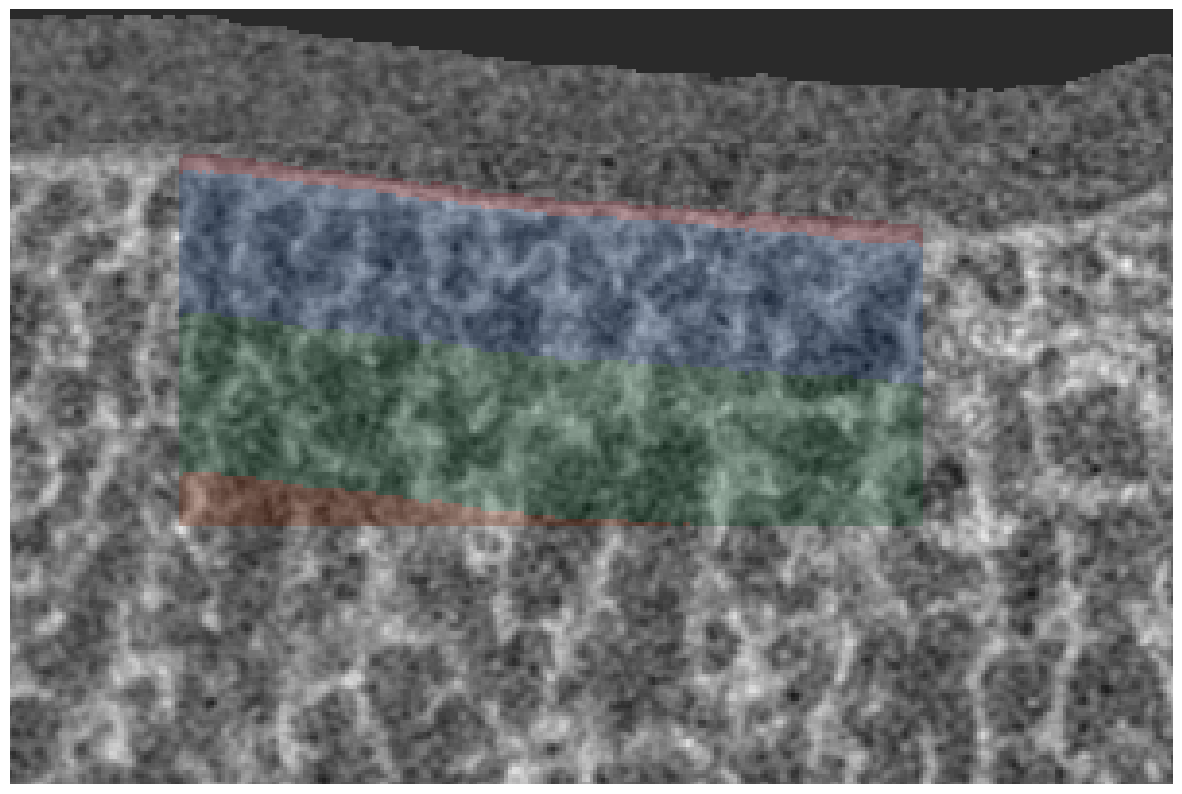

In [37]:
slice_num = 450
mask_opacity = 0.3

cmaps = ["Blues", "Greens", "Oranges", "Reds"]

fig = plt.figure(figsize=(15,15))

plt.imshow(knee_image[:,slice_num,:], cmap="gist_gray")
for roi_mask, cmap in zip(roi_masks, cmaps):
    plt.imshow(
        roi_mask[:,slice_num,:], cmap=cmap, 
        alpha=mask_opacity*(roi_mask[:,slice_num,:]).astype(float)
    )

plt.xlim(200,500)
plt.ylim(300,100)
    
plt.axis("off")

plt.show()